In [15]:
first_letter = 'A'  # Change 'A' to the first letter of your name if needed

# Calculate the individual task number according to the formula
N = ord(first_letter) % 5 + 1
print("task:", N)


task: 1


,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Thumbnail
0,1.png,Color,PNG,3,0.70,967,601,C:\Users\berkx\anaconda3\envs\Lab5\images2\1.png,
1,2.jpeg,Color,JPEG,3,0.05,718,750,C:\Users\berkx\anaconda3\envs\Lab5\images2\2.jpeg,
2,2.PNG,Color,PNG,3,0.47,716,450,C:\Users\berkx\anaconda3\envs\Lab5\images2\2.PNG,
3,3.jpg,Color,JPG,3,0.06,730,411,C:\Users\berkx\anaconda3\envs\Lab5\images2\3.jpg,
4,4.jpg,Color,JPG,3,0.03,700,394,C:\Users\berkx\anaconda3\envs\Lab5\images2\4.jpg,
5,5.jpg,Color,JPG,3,0.04,700,394,C:\Users\berkx\anaconda3\envs\Lab5\images2\5.jpg,
6,6.jpg,Color,JPG,3,0.07,800,533,C:\Users\berkx\anaconda3\envs\Lab5\images2\6.jpg,
7,8.PNG,Color,PNG,3,0.56,960,463,C:\Users\berkx\anaconda3\envs\Lab5\images2\8.PNG,
8,9.PNG,Color,PNG,3,0.21,578,372,C:\Users\berkx\anaconda3\envs\Lab5\images2\9.PNG,

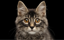
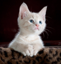
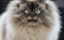
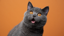
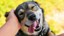
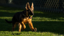
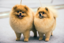
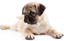

In [12]:
import os
import cv2
import pandas as pd
from PIL import Image
from io import BytesIO
import base64
import glob

def get_image_info(folder_path):
    # Data list to store image information
    data = []

    # Supported image formats
    image_formats = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')

    # Loop through each file in the folder
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        if file_path.lower().endswith(image_formats):
            # Load the image using OpenCV
            image = cv2.imread(file_path)
            
            if image is None:
                continue
            
            # Get image properties
            file_name = os.path.basename(file_path)
            color_model = 'Grayscale' if len(image.shape) == 2 else 'Color'
            file_format = file_path.split('.')[-1].upper()
            channels = image.shape[2] if len(image.shape) == 3 else 1
            file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)  # in MB
            width, height = image.shape[1], image.shape[0]
            full_path = os.path.abspath(file_path)

            # Create image thumbnail (Base64 for dataframe display)
            pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            pil_image.thumbnail((64, 64))
            buffered = BytesIO()
            pil_image.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()

            # Append image information to the list
            data.append({
                'File Name': file_name,
                'Color Model': color_model,
                'Format': file_format,
                'Channels': channels,
                'File Size (MB)': file_size,
                'Width': width,
                'Height': height,
                'Full Path': full_path,
                'Thumbnail': f'<img src="data:image/png;base64,{img_str}"/>'
            })

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    
    # Return the DataFrame
    return df

# Set the folder path
folder_path = 'images2'

# Call the function and display the results
df = get_image_info(folder_path)

# Display the dataframe with thumbnails in Jupyter
from IPython.display import display, HTML
display(HTML(df.to_html(escape=False)))
